# PyTorch Tutorial 01:Tensor Basics

In [1]:
import torch

The very basic class in PyTorch library is the tensor class. almost Every variable and operation in PyTorch is represented by a tensor. You can look at the tensor as just like a numpy array or a multi-dimensional python list.
Because of the mathematical nature of Machine Learning operations which are performed on lineralgebra, we need such a class to implement and use the calculations in python.

Tensor can be used in CPU or GPU. Using GPU makes the calculations so much fater. To move the tensor to GPU, you have to use  `tensor.to('cuda')` or `tensor.to(device)` function.




Creating tensors:

In [30]:
x = torch.randn(4,4)
print(x)

tensor([[ 1.0936,  1.1314,  0.9923, -0.1372],
        [-0.4633,  0.1618,  0.1420,  0.7852],
        [-0.2799, -0.5731,  1.3980, -1.0286],
        [-1.5559, -0.8348,  1.2089, -0.2055]])


In [31]:
print(x[:,0])

tensor([ 1.0936, -0.4633, -0.2799, -1.5559])


In [40]:
y = x.view(2,2,2,2)
print(y)

tensor([[[[ 1.0936,  1.1314],
          [ 0.9923, -0.1372]],

         [[-0.4633,  0.1618],
          [ 0.1420,  0.7852]]],


        [[[-0.2799, -0.5731],
          [ 1.3980, -1.0286]],

         [[-1.5559, -0.8348],
          [ 1.2089, -0.2055]]]])


# Simple Liner regression using Numpy

In [53]:
import numpy as np

In [99]:
# Training Data
X = np.array([1,2,3,4,5], dtype=np.float32)
Y = np.array([2,4,6,8,10], dtype=np.float32)

# Test Data
x_test = np.array([6], dtype=np.float32)
y_test = np.array([12], dtype=np.float32)

# Weights: A single nuron
weights = np.random.rand()

In [100]:
# Forward pass:
# Predict the output of the network on the input data.
def forward(x, weights):
    return x*weights

# Calculating gradiants: 
# dJ/dw = 1/N * 2x *(w*x-y) // w*x = y_pred
def backward(x, y, w):
    return np.dot(2*x, (w*x-y)).mean()

# Model loss function:
# MSE = 1/N * sum((y_i - y_hat_i)^2)
def mse(y,y_pred):
    return np.mean(np.square(y-y_pred))

print (f'prediction before training f({x_test}): {forward(x_test, weights)}')    

prediction before training f([6.]): [3.1134367]


In [101]:
learning_rate = 0.01
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    Y_pred = forward(X, weights)

    # Compute and print loss
    loss = mse(Y, Y_pred)

    # Backward pass: Compute gradient of the loss with respect to model parameters
    dw = backward(X,Y,weights)

    # Update parameters
    weights = weights - learning_rate * dw
    if (epoch) % 10 == 0:
        print(f"Epoch: {epoch} loss={loss:0.3f}, weights={weights}")
        
print (forward(x_test, weights))

Epoch: 0 loss=24.130, weights=2.14810945503594
Epoch: 10 loss=0.000, weights=2.0000000976789147
Epoch: 20 loss=0.000, weights=2.0000000976789147
Epoch: 30 loss=0.000, weights=2.0000000976789147
Epoch: 40 loss=0.000, weights=2.0000000976789147
Epoch: 50 loss=0.000, weights=2.0000000976789147
Epoch: 60 loss=0.000, weights=2.0000000976789147
Epoch: 70 loss=0.000, weights=2.0000000976789147
Epoch: 80 loss=0.000, weights=2.0000000976789147
Epoch: 90 loss=0.000, weights=2.0000000976789147
[12.]


# Simple linear regression using PyTorch

In [102]:
import torch

In [110]:
# Training Data
X = torch.tensor([1,2,3,4,5], dtype=torch.float32)
Y = torch.tensor([2,4,6,8,10], dtype=torch.float32)

# Test Data
x_test = torch.tensor([6], dtype=torch.float32)
y_test = torch.tensor([12], dtype=torch.float32)

# Weights: A single nuron
weights = torch.randn(1, requires_grad=True, dtype=torch.float32)

In [114]:
# Forward pass:
# Predict the output of the network on the input data.
def forward(x, weights):
    return x*weights

# Model loss function:
# MSE = 1/N * sum((y_i - y_hat_i)^2)
def mse(y,y_pred):
    return ((y-y_pred)**2).mean()

In [116]:
learning_rate = 0.01
num_epochs = 100

for epoch in range(num_epochs):
    y_pred = forward(X, weights)
    loss = mse(Y, y_pred)
    loss.backward()
    with torch.no_grad():
        weights -= learning_rate * weights.grad
    
    weights.grad.zero_()
    
    if (epoch) % 10 == 0:
        print(f"Epoch: {epoch} loss={loss:0.3f}, weights={weights}")
        
print (forward(x_test, weights)) 

Epoch: 0 loss=49.172, weights=tensor([0.9472], requires_grad=True)
Epoch: 10 loss=0.139, weights=tensor([1.9122], requires_grad=True)
Epoch: 20 loss=0.001, weights=tensor([1.9927], requires_grad=True)
Epoch: 30 loss=0.000, weights=tensor([1.9994], requires_grad=True)
Epoch: 40 loss=0.000, weights=tensor([1.9999], requires_grad=True)
Epoch: 50 loss=0.000, weights=tensor([2.0000], requires_grad=True)
Epoch: 60 loss=0.000, weights=tensor([2.0000], requires_grad=True)
Epoch: 70 loss=0.000, weights=tensor([2.0000], requires_grad=True)
Epoch: 80 loss=0.000, weights=tensor([2.0000], requires_grad=True)
Epoch: 90 loss=0.000, weights=tensor([2.0000], requires_grad=True)
tensor([12.0000], grad_fn=<MulBackward0>)


# Linear regression using PyTorch and Its optimizers

In [117]:
import torch

In [176]:
# Training Data
X = torch.tensor([[1],[2],[3],[4],[5]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8],[10]], dtype=torch.float32)

# Test Data
x_test = torch.tensor([6], dtype=torch.float32)
y_test = torch.tensor([12], dtype=torch.float32)

n_samples, n_features = X.shape

input_size = n_features
output_size = n_features

model = torch.nn.Linear(input_size, output_size)
print (f'prediction before training f({x_test}): {model(x_test).item():.3f}')    


prediction before training f(tensor([6.])): 0.314


In [177]:
learning_rate = 0.01
num_epochs = 2000

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss = torch.nn.MSELoss()

for epoch in range(num_epochs):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch) % 500 == 0:
        print(f"Epoch: {epoch} loss={l.item():0.5f}, weights={weights[0].item():0.5f}")

print (f"{model(x_test).item():0.3f}") 

Epoch: 0 loss=45.60832, weights=0.29675
Epoch: 500 loss=0.00051, weights=0.29675
Epoch: 1000 loss=0.00002, weights=0.29675
Epoch: 1500 loss=0.00000, weights=0.29675
12.000


## Turning Model to a class

In [16]:
class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.ll_1 = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        return self.ll_1(x)
    


In [180]:
model = Model()

learning_rate = 0.01
num_epochs = 2000

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss = torch.nn.MSELoss()

for epoch in range(num_epochs):
    y_pred = model(X)
    l = loss(Y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch) % 500 == 0:
        print(f"Epoch: {epoch} loss={l.item():0.5f}, weights={weights[0].item():0.5f}")

print (f"{model(x_test).item():0.3f}") 

Epoch: 0 loss=25.06746, weights=0.29675
Epoch: 500 loss=0.00030, weights=0.29675
Epoch: 1000 loss=0.00001, weights=0.29675
Epoch: 1500 loss=0.00000, weights=0.29675
12.000


# Linear Regression

In [8]:
import torch
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [43]:
dataset = datasets.make_regression(n_samples=20, n_features=1, noise=20, random_state=1)

X, Y = torch.from_numpy(dataset[0].astype(np.float32)), torch.from_numpy(dataset[1].astype(np.float32))
Y = Y.view(Y.shape[0], 1)
n_samples, n_features = X.shape

In [44]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.ll_1 = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        return self.ll_1(x)
    
    def parameters(self):
        return self.ll_1.parameters()

Epoch: 10, Loss: 4329.4775
Epoch: 20, Loss: 2708.6128
Epoch: 30, Loss: 1734.7949
Epoch: 40, Loss: 1148.6836
Epoch: 50, Loss: 795.2168
Epoch: 60, Loss: 581.5770
Epoch: 70, Loss: 452.1308
Epoch: 80, Loss: 373.4837
Epoch: 90, Loss: 325.5564
Epoch: 100, Loss: 296.2536
Epoch: 110, Loss: 278.2736
Epoch: 120, Loss: 267.1989
Epoch: 130, Loss: 260.3493
Epoch: 140, Loss: 256.0942
Epoch: 150, Loss: 253.4388
Epoch: 160, Loss: 251.7736
Epoch: 170, Loss: 250.7242
Epoch: 180, Loss: 250.0597
Epoch: 190, Loss: 249.6365
Epoch: 200, Loss: 249.3657
Epoch: 210, Loss: 249.1916
Epoch: 220, Loss: 249.0790
Epoch: 230, Loss: 249.0059
Epoch: 240, Loss: 248.9582
Epoch: 250, Loss: 248.9269
Epoch: 260, Loss: 248.9063
Epoch: 270, Loss: 248.8927
Epoch: 280, Loss: 248.8837
Epoch: 290, Loss: 248.8777
Epoch: 300, Loss: 248.8736
Epoch: 310, Loss: 248.8710
Epoch: 320, Loss: 248.8692
Epoch: 330, Loss: 248.8679
Epoch: 340, Loss: 248.8671
Epoch: 350, Loss: 248.8665
Epoch: 360, Loss: 248.8662
Epoch: 370, Loss: 248.8660
Epoch:

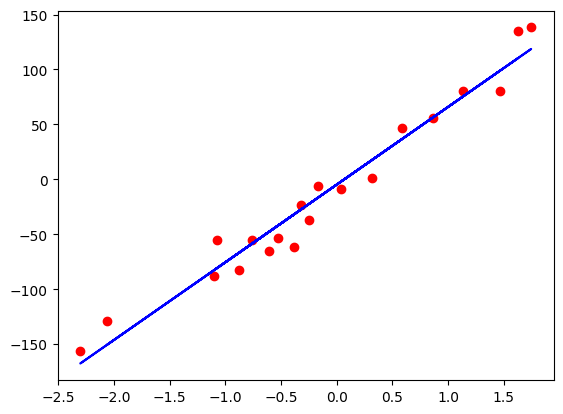

In [45]:
model = Model()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000

for epoch in range(num_epochs):
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

prediction = model(X).detach().numpy()

plt.plot(X.detach().numpy(), Y.detach().numpy(), 'ro')
plt.plot(X.detach().numpy(), prediction, 'b')



# Logistic Regression

In [82]:
import torch
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [92]:
dataset = sklearn.datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

n_samples, n_features = X.shape

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = sklearn.preprocessing.StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [93]:
class LogisticRegression(torch.nn.Module):
    
    def __init__(self, num_features):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [106]:
model = LogisticRegression(n_features)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        with torch.no_grad():
            prediction = model(x_test).round()
            accuracy = prediction.eq(y_test).sum().item() / len(y_test)
            print(f'epoch: {epoch}, loss: {loss.item():.03f}, accuracy: {accuracy:.03f}')    

epoch: 0, loss: 0.892, accuracy: 0.281
epoch: 10, loss: 0.650, accuracy: 0.667
epoch: 20, loss: 0.515, accuracy: 0.860
epoch: 30, loss: 0.433, accuracy: 0.939
epoch: 40, loss: 0.380, accuracy: 0.947
epoch: 50, loss: 0.342, accuracy: 0.965
epoch: 60, loss: 0.315, accuracy: 0.965
epoch: 70, loss: 0.293, accuracy: 0.965
epoch: 80, loss: 0.276, accuracy: 0.965
epoch: 90, loss: 0.262, accuracy: 0.965
